In [ ]:
import sys
%matplotlib inline
# Add necessary paths
sys.path.append(os.path.abspath("../"))
from electrophysiology_mapping import preprocessing


Reading Intan Technologies RHS Data File, Version 3.3

Found 17 amplifier channels.
Found 0 board ADC channels.
Found 0 board DAC channels.
Found 0 board digital input channels.
Found 0 board digital output channels.

File contains 60.002 seconds of data.  Amplifiers were sampled at 30.00 kS/s.
numsamples and numblocks
1800064
14063
FINISHED HEADER

Allocating memory for data...
Reading data from file...
10% done...
20% done...
30% done...
40% done...
50% done...
60% done...
70% done...
80% done...
90% done...
Parsing data...
No missing timestamps in data.
Done!  Elapsed time: 2.5 seconds

Reading Intan Technologies RHS Data File, Version 3.3

Found 17 amplifier channels.
Found 0 board ADC channels.
Found 0 board DAC channels.
Found 0 board digital input channels.
Found 0 board digital output channels.

File contains 60.002 seconds of data.  Amplifiers were sampled at 30.00 kS/s.
numsamples and numblocks
1800064
14063
FINISHED HEADER

Allocating memory for data...
Reading data from fi

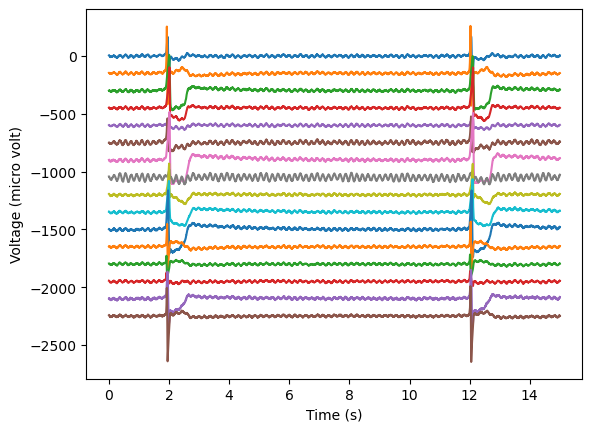

In [ ]:
%matplotlib inline
sampling_rate = 10000
use_raw_data = 0
cutoff_frequency = 1000

data_path = "E:\Desktop\omipolar\DataPlotting\DrugData\CO4_3_17\co4 day 4 10 uM isoproterenol died_240317_185218\co4 day 4 10 uM isoproterenol_240317_185218.rhs"
data_path_2 = "E:\Desktop\omipolar\DataPlotting\DrugData\CO4_3_17\co4 day 4 10 uM isoproterenol died_240317_185218\co4 day 4 10 uM isoproterenol_240317_185318.rhs"
wanted_channel = list(range(16))

#processed_data = preprocessing.processingPipline(data_paths['data_1'], data_paths['data_2'])
processed_data = preprocessing.processingPipline(data_path, data_path, cutoff=cutoff_frequency,fs_new= sampling_rate)
#raw_data = preprocessing.extract_raw_data(data_path, data_path)
available_data = processed_data#[wanted_channel]
raw_data = preprocessing.extract_raw_data(data_path, data_path_2)
if use_raw_data:
    available_data = raw_data;sampling_rate = 30000
target_indeces = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
#preprocessing.plotWaves(processed_data, wanted_channel, start= 30000, sample= 50000)
#target_indeces = [2,3,4,5,9,10,11,12,13,15]
target_data = available_data[target_indeces]
target_data_copy = target_data.copy()
preprocessing.plotWaves(available_data, target_indeces, start= 30000, sample= 15000)

In [3]:
# import matplotlib.pyplot as plt 
# import numpy as np
# from scipy.signal import butter, lfilter, resample
# import scipy.signal
# from organoidContour.preprocessing import *
# def processingPipline_1(data_address_1, data_address_2, fs = 30000,
#                        cutoff = 1000, fs_new = 10000, window_length = 21, 
#                        polyorder = 3, plot = 0, one_address = 0):
#     '''
#     fs: sampling frequency of the raw signal
#     '''
#     if one_address:
#         data_1 = ld.read_data(data_address_1)
#         raw_data = data_1['amplifier_data']
#     else:
#         data_1 = ld.read_data(data_address_1)
#         data_2 = ld.read_data(data_address_2)
#         raw_data_1 = data_1['amplifier_data']
#         raw_data_2 = data_2['amplifier_data']
#         raw_data = np.concatenate((raw_data_1,raw_data_2), axis = 1)
#     processed_data = np.zeros((32, int(len(raw_data[0])*fs_new/fs)))
#     print('Filtering Data...')
#     for i in range(raw_data.shape[0]):
#         filtered = butter_lowpass_filter(raw_data[i], cutoff,fs)
#         processed_data[i] = resample(filtered, int(len(raw_data[i])*fs_new/fs))
    
#     smoothed_data = processed_data
#     j = 0
#     for i in range(smoothed_data.shape[0]):
#         # Extract the data for the current channel and specified range
#         #smoothed_data[i] = scipy.signal.savgol_filter(processed_data[i], window_length, polyorder)
#         if(plot):
#             plt.plot(smoothed_data[i][0:7000].T-j*100, label = f'Channel {i+1}')
#             j = j+1
#     if(plot):
#         plt.legend()
#         plt.show()   
#     print('Filtering Done!')
    
#     return processed_data

# #processed_data = preprocessing.processingPipline(data_paths['data_1'], data_paths['data_2'])
# processed_data = processingPipline(data_path, data_path, cutoff=2000)
# #raw_data = preprocessing.extract_raw_data(data_path, data_path)
# available_data = processed_data#[wanted_channel]
# raw_data = preprocessing.extract_raw_data(data_path, data_path)
# target_indeces = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
# target_data = available_data[target_indeces]
# target_data_copy = target_data.copy()

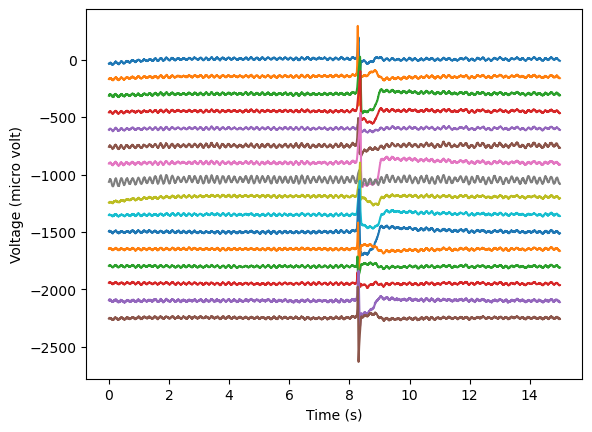

In [4]:

wanted_channel = list(range(1,17))
preprocessing.plotWaves(processed_data, wanted_channel, start= 1000, sample= 15000)

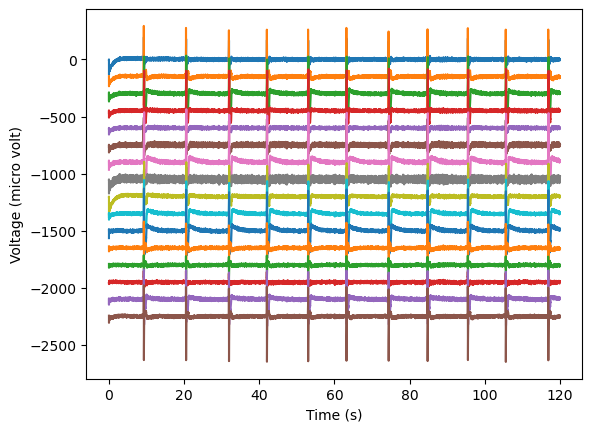

In [5]:

preprocessing.plotWaves(available_data, target_indeces, start= 0, sample= 120000)


In [6]:
from organoidContour import spike
from organoidContour.spike import *
from organoidContour import spike
import importlib
importlib.reload(spike)
from organoidContour.spike import *
# Now using target data to test the spike module
# Calculate BPM for each 5-second window
#sampling_rate = 10000  # Hz, adjust to your data
#bpm_over_time, peaks_all = process_electrodes(target_data, sampling_rate)

In [7]:
# %matplotlib inline
# for i in range(target_data.shape[0]):
#     print("Target indeces")
#     print(target_indeces[i])
#     #peaks = auto_threshold_detect_spike_peaks(data = target_data[i])
#     peaks = list(np.array(peaks_all[i]))
#     overlay_spike_peaks(target_data[i], peaks, window_size=300)
#     isi = plotISI(peaks)
#     print("Length of ISI")
#     print(len(isi)+1)
#     print("Mean of ISI")
#     print(np.mean(np.diff(peaks)))

In [8]:
def find_peak_based_on_reference_channel(data, reference_index, max = [1,1,-1,1,1,1,1,1,-1,-1,1,1], peak_range = (200,200), sd=2, multi = 1, reference_peak = None):
    # In shape of #channels * # peaks
    peaks = detect_peak(data[reference_index], sd=sd, multi = multi)
    print(peaks)
    if reference_peak is not None:
        peaks = reference_peak
    #peaks = auto_threshold_detect_spike_peaks(data[reference_index], plot=1)
    all_peak = np.zeros((data.shape[0],len(peaks)))
    j = 0 # Channel index
    k = -1 # Peak index
    for peak in peaks:
        j = 0
        k = k+1
        for i in range(data.shape[0]):
            all_peak[j,k] = find_peak(data[i], peak - peak_range[0], peak+peak_range[1],max[j] )
            j = j+1
    return all_peak

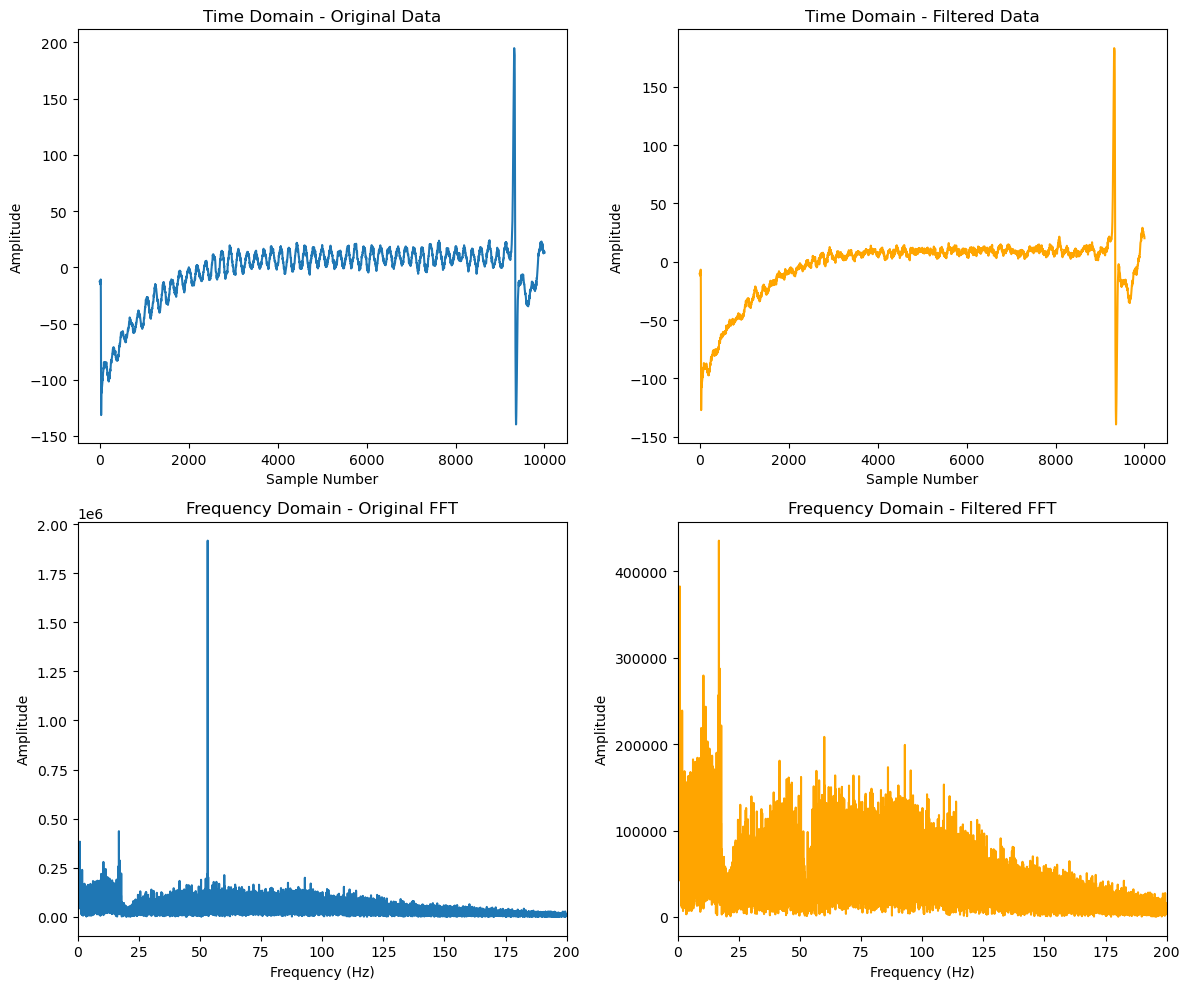

In [9]:
prepare_filter = True
fs = sampling_rate  # Sampling rate in Hz
lowcut = 16  # Low cut frequency in Hz
highcut = 17  # High cut frequency in Hz
lowcut_2 = 52
highcut_2 = 54
lowcut_3 = 59
highcut_3 = 61
%matplotlib inline
if (prepare_filter):
    channel = target_data_copy[:,60*fs:120*fs][0]

    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.signal import butter, filtfilt


    # Sampling rate and filter parameters



    # Create the bandstop filter
    b, a = butter(N=1, Wn=[lowcut, highcut], btype='bandstop', fs=fs)

    b_2, a_2 = butter(N=1, Wn=[lowcut_2, highcut_2], btype='bandstop', fs=fs)

    b_3, a_3 = butter(N=1, Wn=[lowcut_3, highcut_3], btype='bandstop', fs=fs)
    # Apply the filter
    filtered_data = filtfilt(b_2,a_2, channel)

    # Compute the FFT of the original and filtered data
    frequencies = np.fft.rfftfreq(channel.size, d=1./fs)
    original_fft = np.abs(np.fft.rfft(channel))
    filtered_fft = np.abs(np.fft.rfft(filtered_data))

    # Plotting
    plt.figure(figsize=(12, 10))

    # Time domain - original data
    plt.subplot(2, 2, 1)
    plt.plot(channel[:fs], label='Original Data')
    plt.title('Time Domain - Original Data')
    plt.xlabel('Sample Number')
    plt.ylabel('Amplitude')

    # Time domain - filtered data
    plt.subplot(2, 2, 2)
    plt.plot(filtered_data[:fs], label='Filtered Data', color='orange')
    plt.title('Time Domain - Filtered Data')
    plt.xlabel('Sample Number')
    plt.ylabel('Amplitude')

    # Frequency domain - original FFT
    plt.subplot(2, 2, 3)
    plt.plot(frequencies, original_fft, label='Original FFT')
    plt.xlim([0,200])
    plt.title('Frequency Domain - Original FFT')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    #plt.xlim(0, fs/2)

    # Frequency domain - filtered FFT
    plt.subplot(2, 2, 4)
    plt.plot(frequencies, filtered_fft, label='Filtered FFT', color='orange')
    plt.xlim([0,200])
    plt.title('Frequency Domain - Filtered FFT')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    #plt.xlim(0, fs/2)

    plt.tight_layout()
    plt.show()


In [10]:
def find_slop(x, a, b, max=1):
    # find the index of the max or min value in a 1d array at a:b
    # Return the index
    # Check if the range is valid
    if a < 0 or b >= len(x) or a > b:
        #print("Error when trying to find the slop",a,b)
        return -1  # Return -1 or some error indication for invalid range
    a = int(a)
    b = int(b)
    # Initialize the index and value of the peak
    peak_index = a
    peak_value = x[a] - x[a+1]
    # Iterate over the range a to b
    for i in range(a + 1, b + 1):
        # Check if we are finding max or min
        if (x[i] - x[i+1] > peak_value):
            peak_value = x[i] - x[i+1]
            peak_index = i

    return peak_index
def find_activation_slope(data, reference_index, peak_range = (200,200), sd=2, multi = 1, reference_peak = None):
    # In shape of #channels * # peaks
    peaks = detect_peak(data[reference_index], sd=sd, multi = multi)
    
    if reference_peak is not None:
        peaks = reference_peak
    #peaks = auto_threshold_detect_spike_peaks(data[reference_index], plot=1)
    all_peak = np.zeros((data.shape[0],len(peaks)))
    j = 0 # Channel index
    k = -1 # Peak index
    for peak in peaks:
        j = 0
        k = k+1
        for i in range(data.shape[0]):
            all_peak[j,k] = find_slop(data[i], peak - peak_range[0], peak+peak_range[1] )
            j = j+1
    return all_peak


In [11]:
from organoidContour import spike
import importlib
# importlib.reload(spike)
# from organoidContour.spike import *
direction = np.zeros((target_data.shape[0],1))+1
#direction[1] = 1
%matplotlib inline

bpm_over_time, peaks_neo = process_electrodes(target_data[:,60*sampling_rate:120*sampling_rate], sampling_rate, threshold_val=[1,12])
print(len(peaks_neo[1]))
peaks = find_peak_based_on_reference_channel(target_data[:,60*sampling_rate:120*sampling_rate],3,direction, 
                                        peak_range= (int(15*sampling_rate/1000),int(15*sampling_rate/1000)), sd = 2, multi= -1,reference_peak=peaks_neo[0])
print(peaks.shape)
largest_slop = find_activation_slope(target_data[:,60*sampling_rate:120*sampling_rate],3,
                                        peak_range= (int(15*sampling_rate/1000),int(15*sampling_rate/1000)), sd = 2, multi= -1,
                                        reference_peak=peaks_neo[1][1:]) #list(peaks[0][1:-1]))# peaks_neo[1][1:])

peaks_save = peaks
latency = np.mean(largest_slop - np.min(largest_slop, axis=0), axis= 1)
peaks = largest_slop
filtered_data = target_data[:,60*sampling_rate:120*sampling_rate]
#peaks = peaks_neo
for i in range(target_data.shape[0]):    
    # filtered_data[i] = filtfilt(b, a, target_data[i,60000:120000])
    if i in [4,7]:
        filtered_data[i] = filtfilt(b, a, target_data[i,60*sampling_rate:120*sampling_rate])
        filtered_data[i] = filtfilt(b_2, a_2,filtered_data[i])
        filtered_data[i] = filtfilt(b_3, a_3,filtered_data[i])
        filtered_data[i] = target_data_copy[i,60*sampling_rate:120*sampling_rate]
        largest_slop[i] = find_activation_slope(filtered_data,3,
                                    peak_range= (0,250), sd = 2, multi= -1,reference_peak=peaks_neo[1][1:])[i] #list(peaks[0][1:-1]))# peaks_neo[1][1:])
        peaks[i] = largest_slop[i]
    else:
        filtered_data[i] = filtfilt(b_2, a_2, target_data[i,60*sampling_rate:120*sampling_rate])
        filtered_data[i] = target_data_copy[i,60*sampling_rate:120*sampling_rate]
        largest_slop[i] = find_activation_slope(filtered_data,3,
                                    peak_range= (0,250), sd = 2, multi= -1,reference_peak=peaks_neo[1][1:])[i]
        peaks[i] = largest_slop[i]
    #overlay_spike_peaks(filtered_data[i], peaks[i], window_size=int(0.1*sampling_rate), title = "Channel "+str(i+1), save = True)

    #isi = plotISI(np.array(peaks[i]),title = "Channel "+str(i+1), save = True)
    # print("Length of ISI")
    # print(len(isi)+1)
    # print("Mean of ISI")
    # print(np.mean(isi[:-1]))
    # print(np.std(isi[:-1]))

largest_slop = largest_slop[:,:-1]
peaks = largest_slop
latency = np.mean(largest_slop - np.min(largest_slop, axis=0), axis= 1)

peaks_save = peaks_save[:,:-1]
latency = np.mean(peaks_save - np.min(peaks_save, axis=0), axis= 1)

55
[2, 19, 27, 9418, 9427, 9439, 9453, 9461, 9476, 9482, 9498, 9511, 9519, 9541, 9563, 9574, 9581, 9592, 9600, 9617, 9630, 9633, 9645, 9650, 9663, 9673, 9678, 9684, 9696, 9700, 9712, 9722, 9738, 9751, 9772, 9777, 9789, 9806, 9811, 9819, 9835, 9857, 9865, 9881, 9891, 9900, 20653, 20662, 20675, 20685, 20693, 20708, 20717, 20728, 20738, 20749, 20757, 20772, 20790, 20808, 20819, 20822, 20831, 20842, 20851, 20864, 20872, 20883, 20897, 20910, 20917, 20933, 20950, 20960, 20973, 20984, 20994, 21009, 21026, 21035, 21050, 21072, 21088, 21103, 21118, 21127, 32061, 32066, 32076, 32088, 32104, 32127, 32139, 32158, 32175, 32184, 32195, 32209, 32219, 32235, 32248, 32275, 32284, 32315, 32331, 32346, 32355, 32364, 32374, 32381, 32399, 32408, 32416, 32423, 32436, 32450, 32462, 32473, 32479, 32489, 32499, 32507, 32516, 32533, 32559, 42166, 42177, 42199, 42209, 42233, 42248, 42260, 42273, 42287, 42298, 42309, 42321, 42336, 42347, 42357, 42369, 42376, 42386, 42399, 42420, 42428, 42439, 42453, 42461, 42471,

In [12]:
filtered_data.shape
peaks.shape

(16, 53)

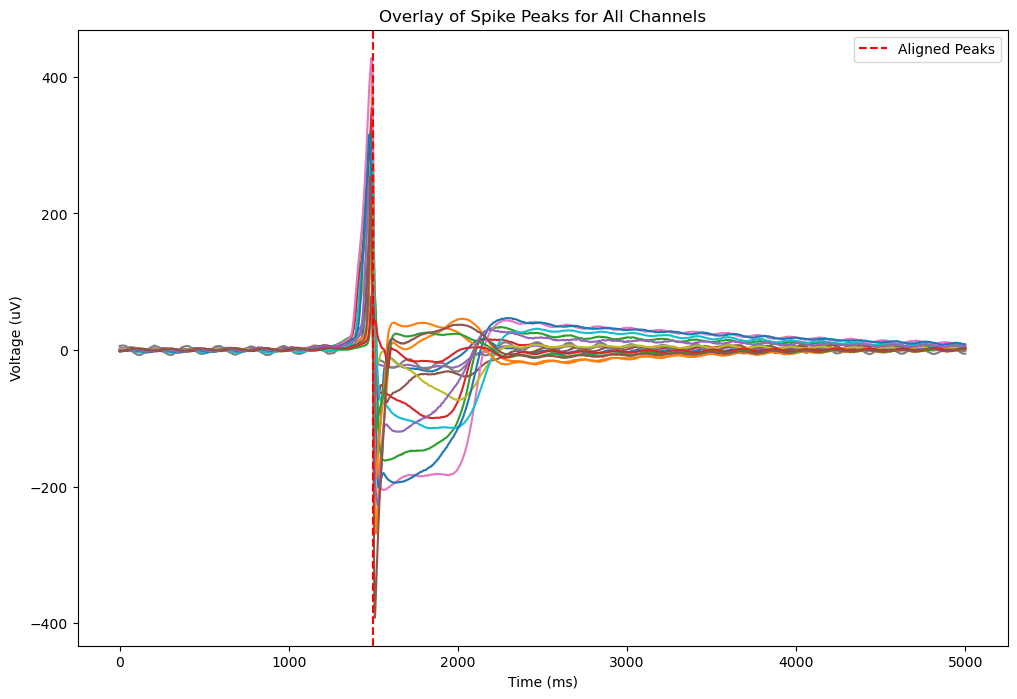

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt

def spike_overlay_multiple_channel(data, peaks, window_size=1000, title=None, save=False):
    """
    Overlay plots of spike peaks for multiple channels, aligning each peak in the same plot.
    
    Parameters:
    - data: 2D numpy array, where each row represents a channel (shape: [num_channels, num_samples]).
    - peaks: list of lists, each containing the peak indices for the corresponding channel.
    - window_size: int, the number of data points to include before and after each peak.
    - title: str, optional, title for the combined plot.
    - save: bool, optional, if True, saves the figure to a file.
    
    Returns:
    - None, but generates and optionally saves a combined plot for all channels.
    """
    num_channels = data.shape[0]

    plt.figure(figsize=(12, 8))

    # Number of points to plot before and after the peak
    window_1 = int(window_size * 0.3)
    window_2 = window_size - window_1

    # Loop through each channel and collect data for overlay
    for channel_idx in range(num_channels):
        channel_data = data[channel_idx]
        channel_peaks = peaks[channel_idx]
        all_segments = []

        # Extract aligned segments around each peak
        for peak_index in channel_peaks:
            start = int(max(0, peak_index - window_1))
            end = int(min(len(channel_data), peak_index + window_2 + 1))
            segment = channel_data[start:end]

            if len(segment) == window_size + 1:
                all_segments.append(segment)
                #plt.plot(segment, color='gray', alpha=0.3)

        # Compute mean segment for the channel and plot
        if len(all_segments) > 0:
            mean_segment = np.mean(np.array(all_segments), axis=0)
            plt.plot(mean_segment)

    # Add vertical line for alignment and labels
    plt.axvline(x=window_1, color='red', linestyle='--', label='Aligned Peaks')
    plt.xlabel('Time (ms)')
    plt.ylabel('Voltage (uV)')
    if title:
        plt.title(title)
    else:
        plt.title('Overlay of Spike Peaks for All Channels')

    plt.legend()

    # Save the plot if required
    if save:
        filename = f"./SpikeOverlay/CombinedOverlay.png"
        plt.savefig(filename, dpi=600)

    plt.show()

# Example usage:
# data = np.random.rand(16, 10000)  # Example data with 16 channels and 10000 samples per channel
# peaks = [list(np.random.randint(100, 9900, size=20)) for _ in range(16)]  # Random peaks for each channel
# spike_overlay_multiple_channel(data, peaks, window_size=1000, title="Combined Spike Overlay", save=True)


spike_overlay_multiple_channel(filtered_data, peaks, window_size=int(0.5*sampling_rate))


In [14]:
latency_all = (largest_slop - np.min(largest_slop, axis=0))

In [15]:
import pickle


# Serialize and save the variable to a file
with open('largest_slope.pkl', 'wb') as f:
    pickle.dump(largest_slop, f)

print("Variable 'largest_slope' has been saved to 'largest_slope.pkl'.")


Variable 'largest_slope' has been saved to 'largest_slope.pkl'.


In [16]:
latency.max()

99.72727272727273

In [17]:
target_indeces = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import linear_sum_assignment

def rank_confusion_matrix(peaks):
    # Assuming peaks is defined elsewhere in your code with shape (number of channels, number of spikes)
    num_spikes = peaks.shape[1]
    num_channels = peaks.shape[0]

    # Initialize the matrix to hold the firing order of channels for each spike
    firing_order_matrix = np.zeros((num_spikes, num_channels), dtype=int)

    # For each spike, find the channel that fires first, then second, and so on
    for spike in range(num_spikes):
        firing_order = np.argsort(peaks[:, spike])
        firing_order_matrix[spike, :] = firing_order

    confusion_matrix_like = np.zeros((num_channels, num_channels))

    # Build the matrix where rows are firing orders and columns are channels
    for i in range(num_spikes):
        for j in range(num_channels):
            channel = firing_order_matrix[i, j]
            confusion_matrix_like[j, channel] += 1

    # Plotting the "confusion matrix"
    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion_matrix_like, annot=True, cmap="YlGnBu", fmt="g",
                xticklabels=[f"Channel {i+1}" for i in range(num_channels)],
                yticklabels=[f"Order {i+1}" for i in range(num_channels)])
    plt.title('Channel Firing Order Across Spikes')
    plt.xlabel('Channels')
    plt.ylabel('Firing Order')
    plt.show()

    # Convert the problem to a maximization problem for Hungarian algorithm
    cost_matrix = confusion_matrix_like.max() - confusion_matrix_like

    # Apply the Hungarian algorithm to find the optimal assignment
    row_ind, col_ind = linear_sum_assignment(cost_matrix)

    # Create a new sorted confusion matrix based on column assignment
    sorted_confusion_matrix = confusion_matrix_like[:, col_ind]

    # Accuracy based on sorted columns and their original firing orders
    accuracy = np.trace(sorted_confusion_matrix) / np.sum(sorted_confusion_matrix)

    # Plotting the sorted "confusion matrix"
    plt.figure(figsize=(10, 8))
    sns.heatmap(sorted_confusion_matrix, annot=True, cmap="YlGnBu", fmt="g",
                xticklabels=[f"Channel {col+1}" for col in col_ind], 
                yticklabels=[f"Order {i+1}" for i in range(num_channels)])
    plt.title(f'Sorted Channel Firing Order Across Spikes: Accuracy = {accuracy:.4f}')
    plt.xlabel('Channels')
    plt.ylabel('Firing Order')
    plt.show()

    return sorted_confusion_matrix, col_ind  # Returning both the matrix and the sorted indices



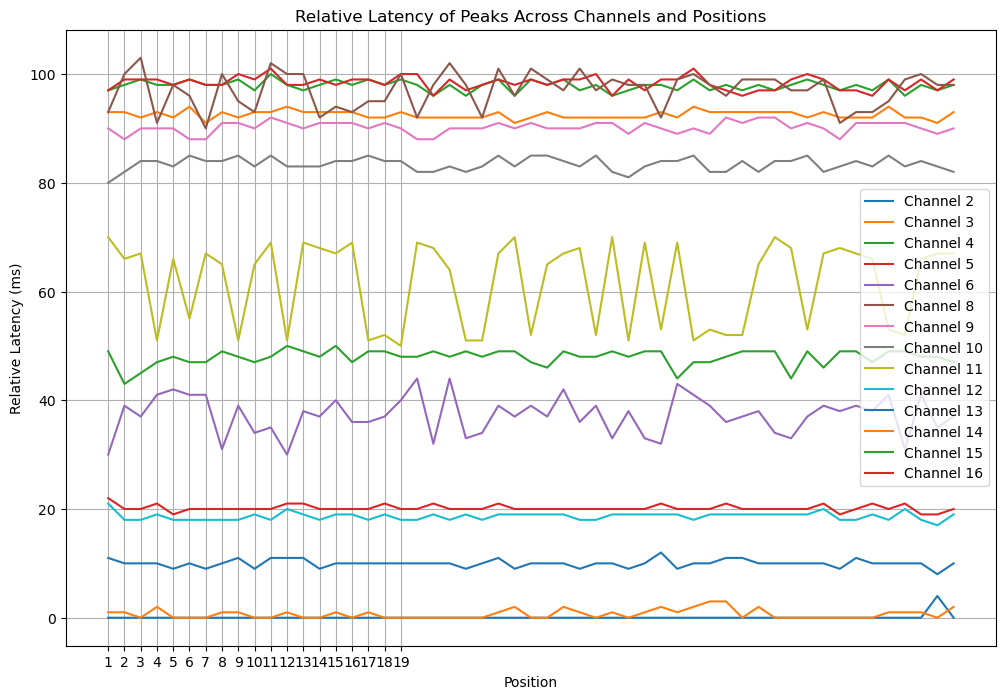

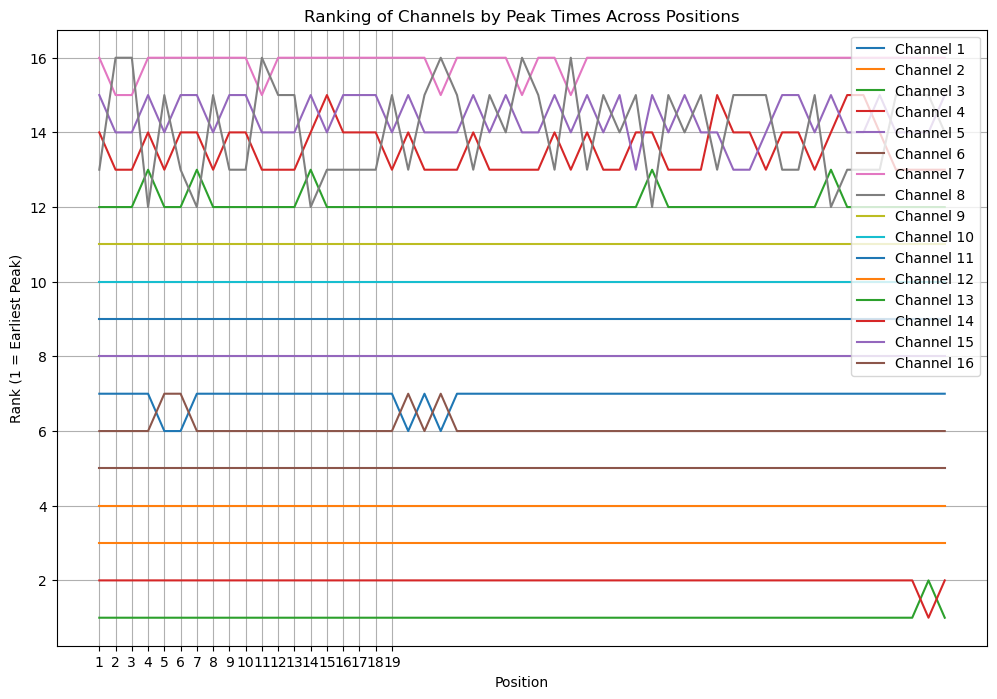

In [19]:
ranks = peak_rank_time(peaks)
relative_latency = peak_rank(peaks)

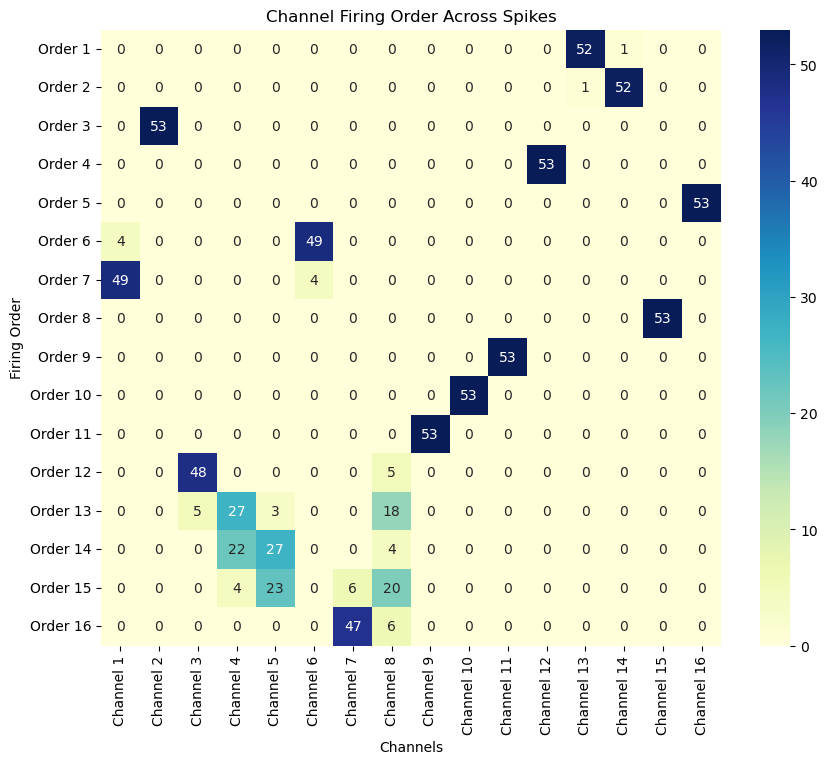

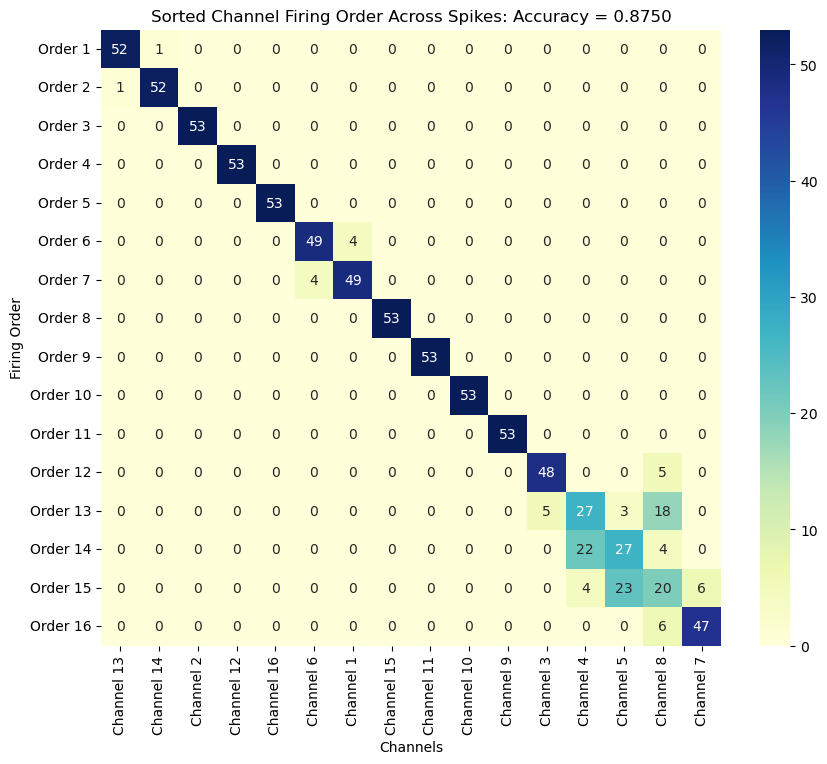

In [20]:
confusion_mat,col_ind = rank_confusion_matrix(peaks)
if cutoff_frequency == 1000:
    col_ind_1000 = col_ind.copy()
if use_raw_data:
    col_ind = col_ind_1000

Spike 1 firing order: [13, 14, 2, 12, 16, 6, 1, 15, 11, 10, 9, 3, 8, 4, 5, 7]
Spike 2 firing order: [13, 14, 2, 12, 16, 6, 1, 15, 11, 10, 9, 3, 4, 5, 7, 8]
Spike 3 firing order: [13, 14, 2, 12, 16, 6, 1, 15, 11, 10, 9, 3, 4, 5, 7, 8]
Spike 4 firing order: [13, 14, 2, 12, 16, 6, 1, 15, 11, 10, 9, 8, 3, 4, 5, 7]
Spike 5 firing order: [13, 14, 2, 12, 16, 1, 6, 15, 11, 10, 9, 3, 4, 5, 8, 7]
Spike 6 firing order: [13, 14, 2, 12, 16, 1, 6, 15, 11, 10, 9, 3, 8, 4, 5, 7]
Spike 7 firing order: [13, 14, 2, 12, 16, 6, 1, 15, 11, 10, 9, 8, 3, 4, 5, 7]
Spike 8 firing order: [13, 14, 2, 12, 16, 6, 1, 15, 11, 10, 9, 3, 4, 5, 8, 7]
Spike 9 firing order: [13, 14, 2, 12, 16, 6, 1, 15, 11, 10, 9, 3, 8, 4, 5, 7]
Spike 10 firing order: [13, 14, 2, 12, 16, 6, 1, 15, 11, 10, 9, 3, 8, 4, 5, 7]
Spike 11 firing order: [13, 14, 2, 12, 16, 6, 1, 15, 11, 10, 9, 3, 4, 5, 7, 8]
Spike 12 firing order: [13, 14, 2, 12, 16, 6, 1, 15, 11, 10, 9, 3, 4, 5, 8, 7]
Spike 13 firing order: [13, 14, 2, 12, 16, 6, 1, 15, 11, 10, 

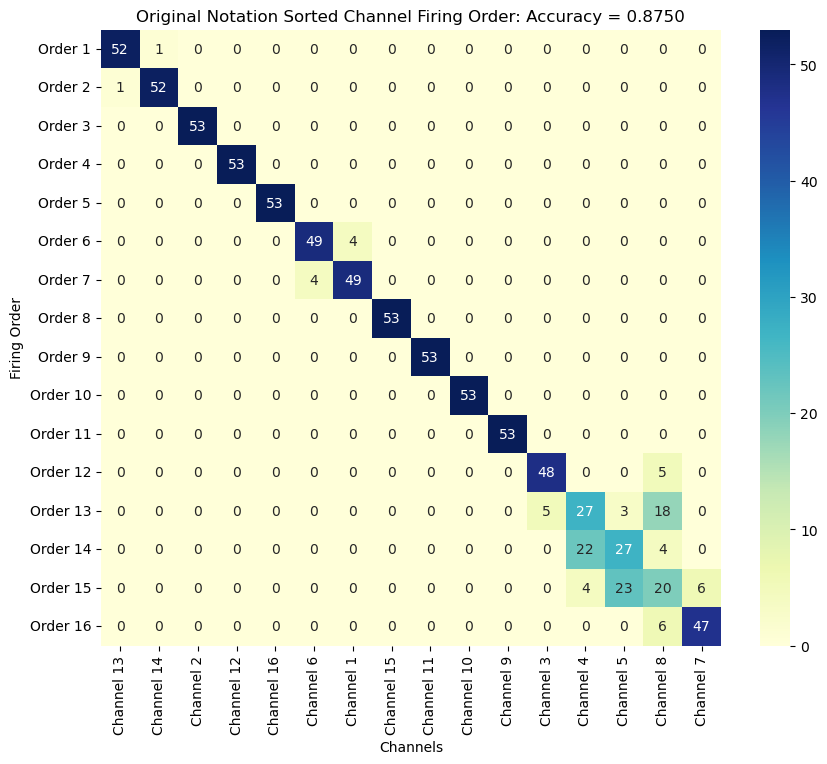

MEA
Spike 1 firing order: [3, 4, 13, 2, 6, 9, 14, 5, 1, 16, 15, 12, 7, 11, 10, 8]
Spike 2 firing order: [3, 4, 13, 2, 6, 9, 14, 5, 1, 16, 15, 12, 11, 10, 8, 7]
Spike 3 firing order: [3, 4, 13, 2, 6, 9, 14, 5, 1, 16, 15, 12, 11, 10, 8, 7]
Spike 4 firing order: [3, 4, 13, 2, 6, 9, 14, 5, 1, 16, 15, 7, 12, 11, 10, 8]
Spike 5 firing order: [3, 4, 13, 2, 6, 14, 9, 5, 1, 16, 15, 12, 11, 10, 7, 8]
Spike 6 firing order: [3, 4, 13, 2, 6, 14, 9, 5, 1, 16, 15, 12, 7, 11, 10, 8]
Spike 7 firing order: [3, 4, 13, 2, 6, 9, 14, 5, 1, 16, 15, 7, 12, 11, 10, 8]
Spike 8 firing order: [3, 4, 13, 2, 6, 9, 14, 5, 1, 16, 15, 12, 11, 10, 7, 8]
Spike 9 firing order: [3, 4, 13, 2, 6, 9, 14, 5, 1, 16, 15, 12, 7, 11, 10, 8]
Spike 10 firing order: [3, 4, 13, 2, 6, 9, 14, 5, 1, 16, 15, 12, 7, 11, 10, 8]
Spike 11 firing order: [3, 4, 13, 2, 6, 9, 14, 5, 1, 16, 15, 12, 11, 10, 8, 7]
Spike 12 firing order: [3, 4, 13, 2, 6, 9, 14, 5, 1, 16, 15, 12, 11, 10, 7, 8]
Spike 13 firing order: [3, 4, 13, 2, 6, 9, 14, 5, 1, 16, 

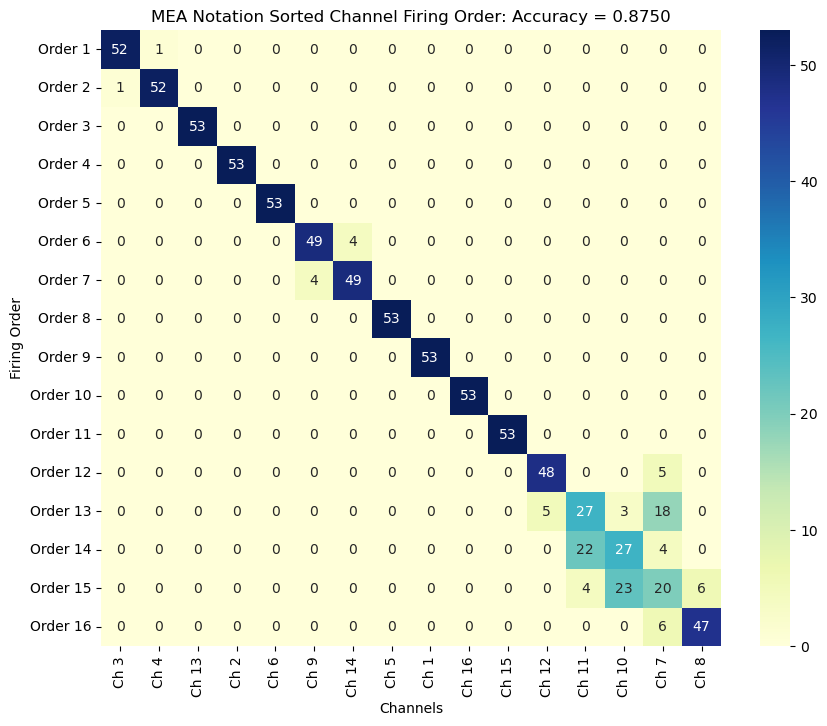

Intan
Spike 1 firing order: [28, 29, 9, 27, 31, 13, 8, 30, 26, 25, 24, 10, 15, 11, 12, 14]
Spike 2 firing order: [28, 29, 9, 27, 31, 13, 8, 30, 26, 25, 24, 10, 11, 12, 14, 15]
Spike 3 firing order: [28, 29, 9, 27, 31, 13, 8, 30, 26, 25, 24, 10, 11, 12, 14, 15]
Spike 4 firing order: [28, 29, 9, 27, 31, 13, 8, 30, 26, 25, 24, 15, 10, 11, 12, 14]
Spike 5 firing order: [28, 29, 9, 27, 31, 8, 13, 30, 26, 25, 24, 10, 11, 12, 15, 14]
Spike 6 firing order: [28, 29, 9, 27, 31, 8, 13, 30, 26, 25, 24, 10, 15, 11, 12, 14]
Spike 7 firing order: [28, 29, 9, 27, 31, 13, 8, 30, 26, 25, 24, 15, 10, 11, 12, 14]
Spike 8 firing order: [28, 29, 9, 27, 31, 13, 8, 30, 26, 25, 24, 10, 11, 12, 15, 14]
Spike 9 firing order: [28, 29, 9, 27, 31, 13, 8, 30, 26, 25, 24, 10, 15, 11, 12, 14]
Spike 10 firing order: [28, 29, 9, 27, 31, 13, 8, 30, 26, 25, 24, 10, 15, 11, 12, 14]
Spike 11 firing order: [28, 29, 9, 27, 31, 13, 8, 30, 26, 25, 24, 10, 11, 12, 14, 15]
Spike 12 firing order: [28, 29, 9, 27, 31, 13, 8, 30, 26,

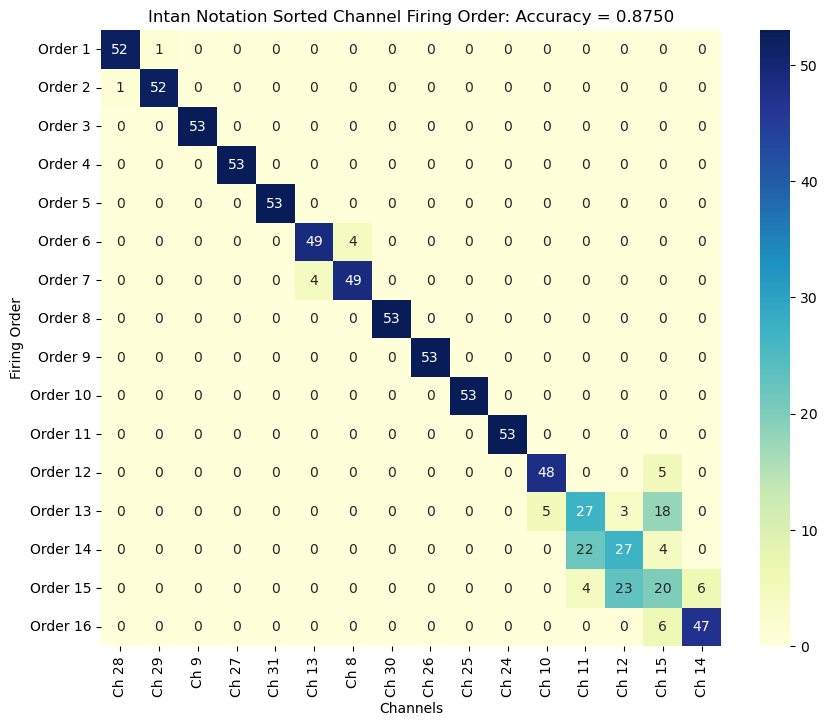

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import linear_sum_assignment

# Original and alternative channel indexing

Intan_index =      [8, 9,10, 11, 12, 13, 14, 15, 24, 25, 26, 27, 28, 29, 30, 31]
MEA_figure_index = [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 1, 2, 3, 4, 5, 6]
MEA_figure_index = [14,13,12, 11, 10, 9 , 8 ,  7, 15, 16, 1, 2, 3, 4, 5, 6]

def rank_confusion_matrix(peaks, channel_indices=None, label_name="Original"):
    num_spikes = peaks.shape[1]
    num_channels = peaks.shape[0]

    # Initialize the matrix to hold the firing order of channels for each spike
    firing_order_matrix = np.zeros((num_spikes, num_channels), dtype=int)

    # Determine the firing order for each spike
    for spike in range(num_spikes):
        firing_order = np.argsort(peaks[:, spike])
        firing_order_matrix[spike, :] = firing_order
        print(f"Spike {spike+1} firing order: {[channel_indices[idx] if channel_indices else idx+1 for idx in firing_order]}")

    confusion_matrix_like = np.zeros((num_channels, num_channels))

    # Fill the matrix with firing order counts
    for i in range(num_spikes):
        for j in range(num_channels):
            channel = firing_order_matrix[i, j]
            confusion_matrix_like[j, channel] += 1

    # # Plot the confusion matrix
    # plt.figure(figsize=(10, 8))
    # sns.heatmap(confusion_matrix_like, annot=True, cmap="YlGnBu", fmt="g",
    #             xticklabels=[f"Ch {channel_indices[i]}" for i in range(num_channels)] if channel_indices else [f"Channel {i+1}" for i in range(num_channels)],
    #             yticklabels=[f"Order {i+1}" for i in range(num_channels)])
    # plt.title(f'{label_name} Channel Firing Order Across Spikes')
    # plt.xlabel('Channels')
    # plt.ylabel('Firing Order')
    # plt.show()

    # Convert to maximization problem for Hungarian algorithm
    cost_matrix = confusion_matrix_like.max() - confusion_matrix_like
    row_ind, col_ind = linear_sum_assignment(cost_matrix)

    # Print optimal channel order after Hungarian algorithm
    optimal_order = [channel_indices[col] if channel_indices else col+1 for col in col_ind]
    print(f"Optimal channel order using Hungarian algorithm: {optimal_order}")

    # Create a sorted confusion matrix based on optimal assignment
    sorted_confusion_matrix = confusion_matrix_like[:, col_ind]

    # Calculate accuracy
    accuracy = np.trace(sorted_confusion_matrix) / np.sum(sorted_confusion_matrix)

    # Plot sorted confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(sorted_confusion_matrix, annot=True, cmap="YlGnBu", fmt="g",
                xticklabels=[f"Ch {channel_indices[col]}" for col in col_ind] if channel_indices else [f"Channel {col+1}" for col in col_ind],
                yticklabels=[f"Order {i+1}" for i in range(num_channels)])
    plt.title(f'{label_name} Sorted Channel Firing Order: Accuracy = {accuracy:.4f}')
    plt.xlabel('Channels')
    plt.ylabel('Firing Order')
    plt.show()

    return sorted_confusion_matrix, col_ind

# Example usage with different notations
#peaks = np.random.rand(16, 100)  # Simulated data with 16 channels and 100 spikes

# Plot using the original index notation
rank_confusion_matrix(peaks, label_name="Original Notation")
print("MEA")
# Plot using MEA figure index notation
rank_confusion_matrix(peaks, MEA_figure_index, label_name="MEA Notation")
print("Intan")
# Plot using Intan index notation
rank_confusion_matrix(peaks, Intan_index, label_name="Intan Notation")
MEA_figure_index = [7, 8, 9, 10, 11, 12, 13, 14,6,  8, 4, 3, 2, 1, 16, 15]
Intan_index =      [8, 9,10, 11, 12, 13, 14, 15, 24,25,26,27,28,29,30,31]


In [22]:
def rank_confusion_matrix(peaks, channel_indices=None, label_name="Original", method="individual"):
    num_spikes = peaks.shape[1]
    num_channels = peaks.shape[0]

    if method == "average":
        # Rank channels based on average spike time
        avg_spike_times = np.mean(peaks, axis=1)
        firing_order = np.argsort(avg_spike_times)
        print(f"Average firing order: {[channel_indices[idx] if channel_indices else idx+1 for idx in firing_order]}")
        confusion_matrix_like = np.zeros((num_channels, num_channels))

        # Single ranking for all spikes
        for j in range(num_channels):
            channel = firing_order[j]
            confusion_matrix_like[j, channel] += 1
        
    else:  # "individual" spike-based ranking
        firing_order_matrix = np.zeros((num_spikes, num_channels), dtype=int)
        
        for spike in range(num_spikes):
            firing_order = np.argsort(peaks[:, spike])
            firing_order_matrix[spike, :] = firing_order
            print(f"Spike {spike+1} firing order: {[channel_indices[idx] if channel_indices else idx+1 for idx in firing_order]}")

        confusion_matrix_like = np.zeros((num_channels, num_channels))

        for i in range(num_spikes):
            for j in range(num_channels):
                channel = firing_order_matrix[i, j]
                confusion_matrix_like[j, channel] += 1

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion_matrix_like, annot=True, cmap="YlGnBu", fmt="g",
                xticklabels=[f"Ch {channel_indices[i]}" for i in range(num_channels)] if channel_indices else [f"Channel {i+1}" for i in range(num_channels)],
                yticklabels=[f"Order {i+1}" for i in range(num_channels)])
    plt.title(f'{label_name} Channel Firing Order ({method.capitalize()})')
    plt.xlabel('Channels')
    plt.ylabel('Firing Order')
    plt.show()

    # Hungarian algorithm
    cost_matrix = confusion_matrix_like.max() - confusion_matrix_like
    row_ind, col_ind = linear_sum_assignment(cost_matrix)
    optimal_order = [channel_indices[col] if channel_indices else col+1 for col in col_ind]
    print(f"Optimal channel order using Hungarian algorithm ({method.capitalize()}): {optimal_order}")

    sorted_confusion_matrix = confusion_matrix_like[:, col_ind]
    accuracy = np.trace(sorted_confusion_matrix) / np.sum(sorted_confusion_matrix)

    # Plot sorted confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(sorted_confusion_matrix, annot=True, cmap="YlGnBu", fmt="g",
                xticklabels=[f"Ch {channel_indices[col]}" for col in col_ind] if channel_indices else [f"Channel {col+1}" for col in col_ind],
                yticklabels=[f"Order {i+1}" for i in range(num_channels)])
    plt.title(f'{label_name} Sorted Channel Firing Order ({method.capitalize()}): Accuracy = {accuracy:.4f}')
    plt.xlabel('Channels')
    plt.ylabel('Firing Order')
    plt.show()

    return sorted_confusion_matrix, col_ind


4.235849056603773 0.09335333491964519
0.9981132075471697 0.07134969962712846
9.250943396226415 0.0716981132075477
9.784905660377358 0.09396150639991531
9.835849056603772 0.12146020331646118
3.7226415094339615 0.3516223904229908
10.139622641509435 0.08542816168054156
9.699999999999998 0.326791145581071
9.018867924528301 0.10649936446543423
8.343396226415095 0.11737608313204385
6.154716981132076 0.768867345757393
1.8660377358490567 0.06988777048095142
0.007547169811320755 0.05442341547870173
0.06603773584905662 0.08454851510342672
4.79056603773585 0.14571120434949308
2.016981132075472 0.05741556247057718
(16, 53)


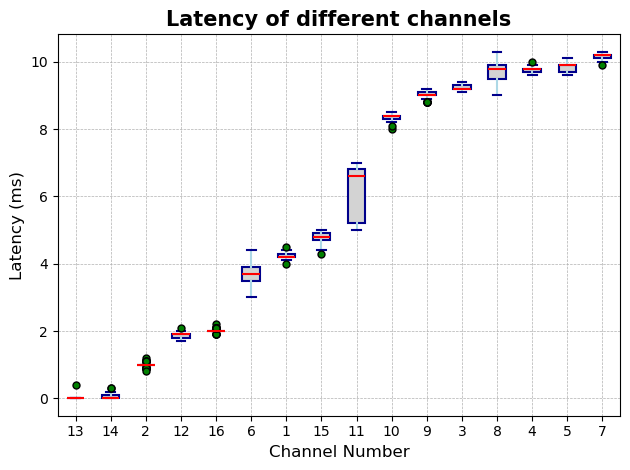

In [23]:
latency_all_ms = latency_all/10
for i in range(latency_all_ms.shape[0]):
    print(np.mean(latency_all_ms[i]), np.std(latency_all_ms[i]))
print(latency_all_ms.shape) #(16,53)
# Calculating the means of each row
means = np.mean(latency_all_ms, axis=1)

# Sorting the means and corresponding rows
sorted_indices = np.argsort(means)
sorted_data = latency_all_ms[sorted_indices]

# Generating channel numbers based on sorted indices (+1 for human-readable format)
channel_numbers = [f"{i+1}" for i in sorted_indices]

# Plotting
fig, ax = plt.subplots()
boxprops = dict(linestyle='-', linewidth=1.5, color='darkblue')
whiskerprops = dict(linestyle='-', linewidth=1.5, color='lightblue')
capprops = dict(linestyle='-', linewidth=1.5, color='darkblue')
medianprops = dict(linestyle='-', linewidth=1.5, color='red')
flierprops = dict(marker='o', markerfacecolor='green', markersize=5, linestyle='none')

box = ax.boxplot(sorted_data.T, labels=channel_numbers, vert=True, patch_artist=True,
                 boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops,
                 medianprops=medianprops, flierprops=flierprops)

for patch in box['boxes']:
    patch.set_facecolor('lightgrey')

ax.set_title('Latency of different channels', fontsize=15, fontweight='bold')
ax.set_xlabel('Channel Number', fontsize=12)
ax.set_ylabel('Latency (ms)', fontsize=12)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [24]:
import numpy as np
import pandas as pd

# Assuming 'latency_all' is your original dataset
latency_all_ms = latency_all / 10

# Calculate the means and standard deviations
stats_data = []
for i in range(latency_all_ms.shape[0]):
    row_mean = np.mean(latency_all_ms[i])
    row_std = np.std(latency_all_ms[i])
    stats_data.append([row_mean, row_std])

# Create DataFrames
stats_df = pd.DataFrame(stats_data, columns=['Mean', 'Standard Deviation'])
full_data_df = pd.DataFrame(latency_all_ms)

# Save to Excel with two sheets
with pd.ExcelWriter('latency_data.xlsx', engine='xlsxwriter') as writer:
    stats_df.to_excel(writer, sheet_name='Statistics', index=True)
    full_data_df.to_excel(writer, sheet_name='Full Data', index=False)

print("Data and statistics saved to Excel successfully!")
print("Statistics DataFrame shape:", stats_df.shape)
print("Full Data DataFrame shape:", full_data_df.shape)


Data and statistics saved to Excel successfully!
Statistics DataFrame shape: (16, 2)
Full Data DataFrame shape: (16, 53)


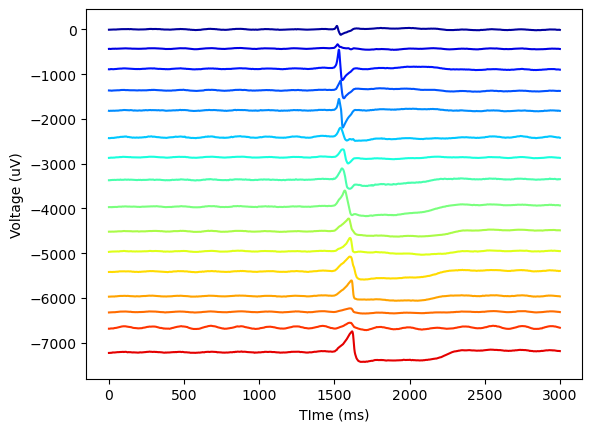

In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Example data: 16 channels with 1000 data points each
plt.clf()
if(0):
    sample = target_data_copy[col_ind][:,int(1.9*sampling_rate):int(2.2*sampling_rate)]  # Replace this with your actual data
else:
    sample = filtered_data[col_ind][:,int(1.9*sampling_rate):int(2.2*sampling_rate)]
#sample = filtfilt(b, a, target_data[col_ind,70000:71000])
# Hexadecimal color codes, ordered as specified
colors = [
    '#E40000', '#FF3400', '#FF6C00', '#FFA300', '#FFDB00', '#DEFF19', 
    '#AAFB48', '#7AFF7D', '#49FFAD', '#19FFDE', '#00C8FF', '#008DFF', 
    '#0051FF', '#0014FF', '#0000E3', '#00009F'
]

# Setup the figure and subplots
intan_ind = [8,9,10,11,12,13,14,15,24,25,26,27,28,29,30,31]
spacing = [ 430,450,480,
           450,600,450,500,
           600,550,450,450,
           550,350,350,550]
# Loop through each channel
for i in range(16):
    plt.plot(sample[i] - np.sum(spacing[:i]), c = colors[15-i], label = 'Channel: '+str(intan_ind[col_ind[i]]))

plt.xlabel('TIme (ms)')
plt.ylabel('Voltage (uV)')
#plt.legend()
plt.show()


In [26]:
'''
calculate CV map it to plot (google ) Triangular method
    https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4593301/
    https://link.springer.com/article/10.1007/s11517-022-02621-0
    
Duration Check how to define it
conduction velocity as arrows 

'''


'\ncalculate CV map it to plot (google ) Triangular method\n    https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4593301/\n    https://link.springer.com/article/10.1007/s11517-022-02621-0\n    \nDuration Check how to define it\nconduction velocity as arrows \n\n'